## HW03 Code


You will complete the following notebook, as described in the PDF for Homework 03 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/summer2021/cs135).

### Import required libraries.

In [237]:
import os
import numpy as np
import pandas as pd

import warnings

import sklearn.linear_model
import sklearn.metrics
import sklearn.calibration

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

C:\Users\adity\AppData\Local\Temp\ipykernel_15188\1357724205.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # pretty matplotlib plots


### Function for later use
This function will compute and return a confusion matrix on data, given probabilistic predictions, and a threshold to use when converting probabilities to "firm" predictions.

***Don't change this function.***

In [238]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

## Cancer-Risk Screening

### 1: Compute true/false positives/negatives.

Complete the following code.

In [239]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    '''
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : int
        Number of true positives
    TN : int
        Number of true negatives
    FP : int
        Number of false positives
    FN : int
        Number of false negatives
    '''
    
    TP = np.sum((ytrue_N == 1) & (yhat_N == 1))
    TN = np.sum((ytrue_N == 0) & (yhat_N == 0))
    FP = np.sum((ytrue_N == 0) & (yhat_N == 1))
    FN = np.sum((ytrue_N == 1) & (yhat_N == 0))
    
    return TP, TN, FP, FN

#### Testing code
The following four calls to the function above test your results.  ***Don't modify this.***

In [240]:
all0 = np.zeros(10)
all1 = np.ones(10)
calc_TP_TN_FP_FN(all0, all1)

(0, 0, 10, 0)

In [241]:
calc_TP_TN_FP_FN(all1, all0)

(0, 0, 0, 10)

In [242]:
calc_TP_TN_FP_FN(all1, all1)

(10, 0, 0, 0)

In [243]:
calc_TP_TN_FP_FN(all0, all0)

(0, 10, 0, 0)

### Load the dataset.

The following should ***not*** be modified.  After it runs, the various arrays it creates will contain the 2- or 3-feature input datasets.

In [2]:
# Load the x-data and y-class arrays
x_train = np.loadtxt('./data_cancer/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_cancer/x_test.csv', delimiter=',', skiprows=1)

y_train = np.loadtxt('./data_cancer/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data_cancer/y_test.csv', delimiter=',', skiprows=1)

NameError: name 'np' is not defined

### 2: Compute the fraction of patients with cancer.

Complete the following code.  Your solution needs to ***compute*** these values from the training and testing sets (i.e., don't simply hand-count and print the values).

In [3]:
# Compute the fraction of patients with cancer in the training set
frac_cancer_train = np.mean(y_train == 1)

# Compute the fraction of patients with cancer in the testing set
frac_cancer_test = np.mean(y_test == 1)

# Print the results

print("Fraction of data that has_cancer on TRAIN: %.3f" % frac_cancer_train) #TODO: modify these prints
print("fraction of data that has_cancer on TEST : %.3f" % frac_cancer_test)

NameError: name 'np' is not defined

### 3: The predict-0-always baseline

#### (a) Compute the accuracy of the always-0 classifier.

Complete the code to compute and print the accuracy of the always-0 classifier on validation and test outputs.

In [246]:
# Always-0 classifier predictions
y_pred_always_0_train = np.zeros_like(y_train)
y_pred_always_0_test = np.zeros_like(y_test)

# Compute accuracy on the training set
accuracy_train = np.mean(y_pred_always_0_train == y_train)

# Compute accuracy on the test set
accuracy_test = np.mean(y_pred_always_0_test == y_test)

# Print the accuracies

print("acc on TRAIN: %.3f" % accuracy_train) #TODO: modify these values
print("acc on TEST : %.3f" % accuracy_test)

acc on TRAIN: 0.860
acc on TEST : 0.861


#### (b) Print a confusion matrix for the always-0 classifier.

Add code below to generate a confusion matrix for the always-0 classifier on the test set.

In [247]:
# TODO: call print(calc_confusion_matrix_for_threshold(...))

# Generate the confusion matrix for the always-0 classifier on the test set
confusion_matrix_always_0_test = calc_confusion_matrix_for_threshold(y_test, y_pred_always_0_test)

# Print the confusion matrix
print("Confusion matrix for the always-0 classifier on TEST:")
print(confusion_matrix_always_0_test)

Confusion matrix for the always-0 classifier on TEST:
Predicted    0  1
True             
0          155  0
1           25  0


#### (c) Reflect on the accuracy of the always-0 classifier.

**Answer**: 

I calculated the accuracy of this classifier by using this formula: Accuracy = (Correct Predictions) / (Total Predictons) = (TP+TN)/(TP+TN+FP+FN) with TP = True Positive FP = False Positive TN = True Negative and FN = False Negative.

I then plugged in the numbers from the matrix into this formula like this: (0+155)/(0+155+0+25). The result is that the accuracy is 86.11%.

So, the accuracy on the TEST dataset is 86.11%. So, the majority of class 0 is correctly predicted, but it's poor in identifying the minority class 1. So, it's not a good classifier overall.

#### (d) Analyze the various costs of using the always-0 classifier.


**Answer**: 

There are many costs in using this classifier.

There's high accuracy on the majority class, but can be misleading if the dataset is imbalanced and biases will be present in the model evaluation metrics. Also, there's low accuracy on the minority class, loss of information since input fueatures are ignored, and no good anomaly detection if class 0 represents normal instances and class 1 represents anomalies.

This result in a lack of trust in users and stakeholders if a system uses this classifier and these issues are present.

### 4: Basic Perceptron Models

#### (a) Create a basic `Perceptron` classifier

Fit a perceptron to the training data.  Print out accuracy on this data, as well as on testing data.  Print out a confusion matrix on the testing data.

In [248]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler
# Create and fit a Perceptron model
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
perceptron_model = Perceptron()
perceptron_model.fit(x_train, y_train)

# Predict on training and test data
y_pred_train = perceptron_model.predict(x_train)
y_pred_test = perceptron_model.predict(x_test)

# Calculate accuracy on training and test data
accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)

# Print the accuracies
print("acc on TRAIN: %.3f" % accuracy_train) #TODO: modify these values
print("acc on TEST : %.3f" % accuracy_test)

# TODO: call print(calc_confusion_matrix_for_threshold(...))

# Print the confusion matrix for the test data
confusion_matrix_test = calc_confusion_matrix_for_threshold(y_test, y_pred_test)
print("Confusion matrix for the test data:")
print(confusion_matrix_test)

acc on TRAIN: 0.402
acc on TEST : 0.494
Confusion matrix for the test data:
Predicted   0   1
True             
0          64  91
1           0  25


#### (b) Compare the `Perceptron` to the always-0 classifier.

**Answer**: 

The always-0 classifier has a much higher accuracy on the TEST data compared to the Perceptron classifier. It also predicts all instances as class 0, which results in a high accuracy but poor performance, especially for class 1, where it fails to predict any instances correctly.

The Perceptron classifier, while having a lower accuracy, at least makes some positive predictions for class 1. However, its overall accuracy is still low.

Overall, the always-0 classifier outperforms the basic Perceptron classifier in terms of accuracy on this particular dataset. The Perceptron classifier struggles to correctly classify both classes and has room for improvement, possibly through more advanced models or feature engineering.


#### (c) Generate a series of regularized perceptron models
Each model will use a different `alpha` value, multiplying that by the L2 penalty.  You will record and plot the accuracy of each model on both training and test data.

In [249]:
from sklearn.linear_model import Perceptron

# Define a range of alpha values on a logarithmic scale
alphas = np.logspace(-5, 5, base=10, num=100)

train_accuracy_list = list()
test_accuracy_list = list()

# Iterate through each alpha value
for alpha in alphas:
    # Create a regularized perceptron model with the specified alpha
    perceptron = Perceptron(penalty='l2', alpha=alpha, random_state=42)
    
    # Fit the model to the training data
    perceptron.fit(x_train, y_train)
    
    # Calculate and record the training accuracy
    train_accuracy = perceptron.score(x_train, y_train)
    train_accuracy_list.append(train_accuracy)
    
    # Calculate and record the test accuracy
    test_accuracy = perceptron.score(x_test, y_test)
    test_accuracy_list.append(test_accuracy)

# TODO: create, fit models here and record accuracy of each



##### Plot accuracy on train/test data across the different alpha values.

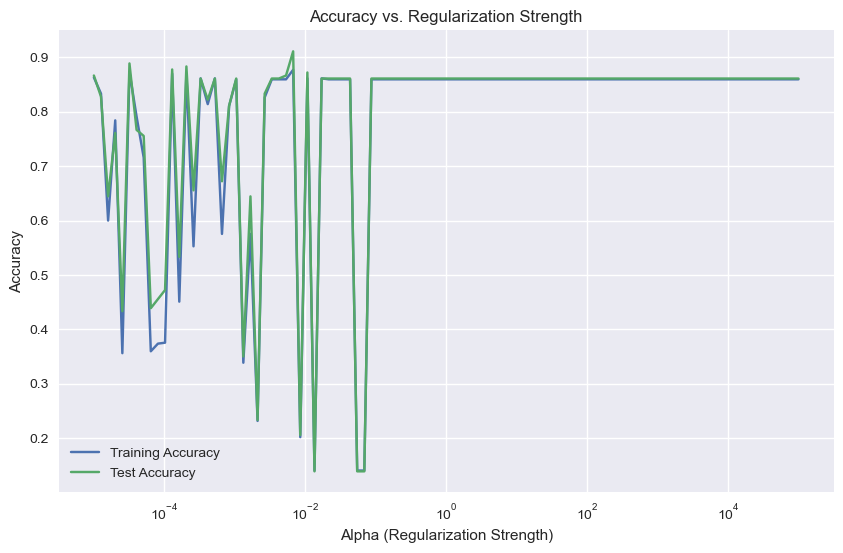

In [261]:
# TODO make plot
'''
# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Plot training accuracy against log(alpha) with a blue line
plt.semilogx(np.log10(alphas), train_accuracy_list, label='Training Accuracy', color='blue')

# Plot test accuracy against log(alpha) with an orange line
plt.semilogx(np.log10(alphas), test_accuracy_list, label='Test Accuracy', color='orange')

# Add labels to the x and y axes
plt.xlabel('log_10(alpha)')
plt.ylabel('Accuracy')

# TODO add legend, titles, etc.
# plt.legend(...);

# Add a legend to distinguish between training and test accuracy lines
plt.legend()

# Add a title to the plot
plt.title('Accuracy vs. log(alpha) for Regularized Perceptron')

# Show the grid
plt.grid(True)

# Display the plot
plt.show()
'''

# Plot the accuracy values against the alpha values
plt.figure(figsize=(8, 6))
plt.semilogx(alphas, train_accuracy_list, label='Training Accuracy')
plt.semilogx(alphas, test_accuracy_list, label='Test Accuracy')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Regularization Strength')
plt.grid(True)
plt.show()


#### (d) Discuss what the plot is showing you.

**Answer**: 

The plot shows that the training and testing data are almost the same from the 10^-4 to 10^4 alpha strength. There's a lot of variance from 10^-4 to a little over 10^-2 alpha until it flat lines at 0.860 and 0.861 for the training and test accuracy at about 10^-1 alpha. 

Overall, the accuracy on the testing and training data is high and about the same for both when it comes to the perceptron models.

### 5: Decision functions and probabilistic predictions

#### (a) Create two new sets of predictions

Fit `Perceptron` and `CalibratedClassifierCV` models to the data.  Use their predictions to generate ROC curves. 

In [251]:
# TODO: fit a Perceptron and generate its decision_function() over the test data.

# TODO: Build a CalibratedClassifierCV, using a Perceptron as its base_estimator, 
#       and generate its probabilistic predictions over the test data.

from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve, roc_auc_score

# Create and fit a Perceptron model
perceptron_model = Perceptron()
perceptron_model.fit(x_train, y_train)

# Generate decision function for the Perceptron
y_score_perceptron = perceptron_model.decision_function(x_test)

# Create and fit a CalibratedClassifierCV model using the Perceptron as the base estimator
calibrated_model = CalibratedClassifierCV(base_estimator=perceptron_model, method='isotonic')
calibrated_model.fit(x_train, y_train)

# Generate probabilistic predictions for the calibrated model
y_prob_calibrated = calibrated_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC for the Perceptron
fpr_perceptron, tpr_perceptron, _ = roc_curve(y_test, y_score_perceptron)
auc_perceptron = roc_auc_score(y_test, y_score_perceptron)

# Compute ROC curve and AUC for the probabilistic model
fpr_calibrated, tpr_calibrated, _ = roc_curve(y_test, y_prob_calibrated)
auc_calibrated = roc_auc_score(y_test, y_prob_calibrated)


c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\calibration.py:300: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


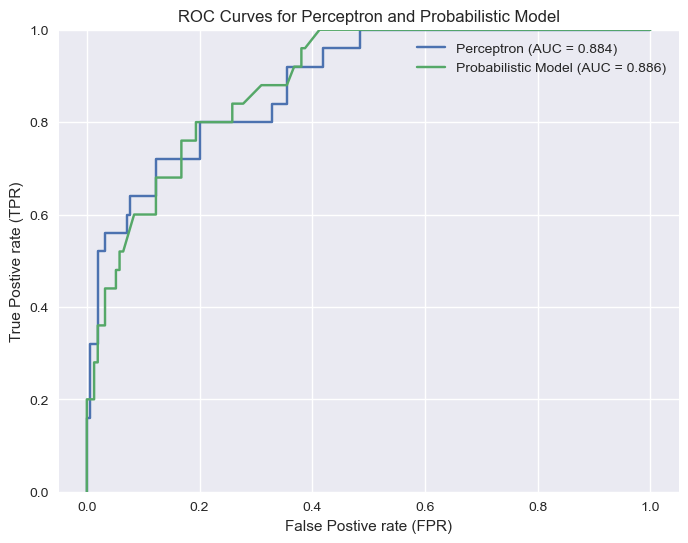

In [252]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_perceptron, tpr_perceptron, label='Perceptron (AUC = %.3f)' % auc_perceptron)
plt.plot(fpr_calibrated, tpr_calibrated, label='Probabilistic Model (AUC = %.3f)' % auc_calibrated)
plt.ylim([0, 1])
plt.xlabel("False Postive rate (FPR)")
plt.ylabel("True Postive rate (TPR)")
plt.legend()
plt.title("ROC Curves for Perceptron and Probabilistic Model")
plt.show()


In [253]:
print("AUC on TEST for Perceptron: %.3f" % auc_perceptron) #TODO: modify these values
print("AUC on TEST for probabilistic model: %.3f" % auc_calibrated)

AUC on TEST for Perceptron: 0.884
AUC on TEST for probabilistic model: 0.886


#### (b) Discuss the results above

**Answer**: 

The results indicate that both the Perceptron and the probabilistic model perform reasonably well in distinguishing between positive and negative classes based on the ROC AUC (Receiver Operating Characteristic Area Under the Curve) values. 


The AUC on the test data for the Perceptron is 0.884. This means that when the Perceptron is used as a binary classifier, it can effectively separate the two classes, achieving a good trade-off between true positive rate (sensitivity) and false positive rate (1-specificity).

The AUC on the test data for the probabilistic model, which uses the CalibratedClassifierCV with the Perceptron as its base estimator, is slightly higher at 0.886. This suggests that the probabilistic model provides a slightly better separation of the classes, although the difference is relatively small.

Both models perform well in distinguishing between the classes, with the probabilistic model having a slightly higher AUC. However, the choice between the two models may also depend on other factors, such as the specific requirements of your application and whether you need probability estimates in addition to binary classification.

#### (c) Compute model metrics for different probabilistic thresholds

Complete the function that takes in a set of correct outputs, a matching set of probabilities generated by a classifier, and a threshold at which to set the positive decision probability, and returns a set of metrics if we use that threshold.

In [254]:
def calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute performance metrics for a given probabilistic classifier and threshold
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    acc : accuracy of predictions
    tpr : true positive rate of predictions
    tnr : true negative rate of predictions
    ppv : positive predictive value of predictions
    npv : negative predictive value of predictions
    '''

    y_pred_N = (yproba1_N >= thresh).astype(int)
    
    TP = np.sum((y_pred_N == 1) & (ytrue_N == 1))
    TN = np.sum((y_pred_N == 0) & (ytrue_N == 0))
    FP = np.sum((y_pred_N == 1) & (ytrue_N == 0))
    FN = np.sum((y_pred_N == 0) & (ytrue_N == 1))
    # TODO: fix this
    acc = (TP+TN) / (TP+TN+FP+FN)
    if TP+TN == 0:
        tpr = 0
    else:
        tpr = TP / (TP+FN)
    if TN + FP == 0:
        tnr = 0
    else:
        tnr = TP / (TP+FN)
    if TP + FP == 0:
        ppv = 0
    else:
        ppv = TP / (TP + FP)
    if TN + FN == 0:
        npv = 0
    else:
        npv = TN / (TN + FN)
    
    return acc, tpr, tnr, ppv, npv

# You can use this function later to make printing results easier; don't change it.
def print_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Pretty print perf. metrics for a given probabilistic classifier and threshold
    '''
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
    
    ## Pretty print the results
    print("%.3f ACC" % acc)
    print("%.3f TPR" % tpr)
    print("%.3f TNR" % tnr)
    print("%.3f PPV" % ppv)
    print("%.3f NPV" % npv)

#### (d) Compare the probabilistic classifier across multiple decision thresholds

Try a range of thresholds for classifying data into the positive class (1).  For each threshold, compute the true postive rate (TPR) and positive predictive value (PPV).  Record the best value of each metric, along with the threshold that achieves it, and the *other* metric at that threshold.

In [255]:
# TODO: test different thresholds to compute these values
thresholds = np.linspace(0, 1.001, 51)

best_TPR = 0
best_PPV_for_best_TPR = 0
best_TPR_threshold = 0

best_PPV = 0
best_TPR_for_best_PPV = 0  
best_PPV_threshold = 0

for threshold in thresholds:
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(y_test, y_prob_calibrated, threshold)
    
    # Check if the current threshold achieves a better TPR or PPV
    if tpr > best_TPR:
        best_TPR = tpr
        best_TPR_threshold = threshold
        best_PPV_for_best_TPR = ppv
    
    if ppv > best_PPV:
        best_PPV = ppv
        best_PPV_threshold = threshold
        best_TPR_for_best_PPV = tpr


In [256]:
print("TPR threshold: %.4f => TPR: %.4f; PPV: %.4f" % (best_TPR_threshold, best_TPR, best_PPV_for_best_TPR))
print("PPV threshold: %.4f => PPV: %.4f; TPR: %.4f" % (best_PPV_threshold, best_PPV, best_TPR_for_best_PPV))

TPR threshold: 0.0000 => TPR: 1.0000; PPV: 0.1389
PPV threshold: 0.6206 => PPV: 1.0000; TPR: 0.2000


#### (e) Exploring diffrerent thresholds

#### (i) Using default 0.5 threshold. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold 0.5.

In [264]:
best_thr = 0.5
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
# TODO: print(calc_confusion_matrix_for_threshold(...))
# Compute and print the confusion matrix
cm_default = calc_confusion_matrix_for_threshold(y_test,y_prob_calibrated, best_thr)
print(cm_default)
# TODO: print_perf_metrics_for_threshold(...)
# Compute and print the performance metrics
print("")
print_perf_metrics_for_threshold(y_test, y_prob_calibrated, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.5000

Predicted    0   1
True              
0          150   5
1           15  10

0.889 ACC
0.400 TPR
0.400 TNR
0.667 PPV
0.909 NPV


#### (ii) Using threshold with highest TPR. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes TPR.

In [265]:
best_thr = best_TPR_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
# TODO: print(calc_confusion_matrix_for_threshold(...))
# Compute and print the confusion matrix
cm_best_TPR = calc_confusion_matrix_for_threshold(y_test, y_prob_calibrated, best_thr)
print(cm_best_TPR)

print("")
# TODO: print_perf_metrics_for_threshold(...)
# Compute and print the performance metrics
print_perf_metrics_for_threshold(y_test, y_prob_calibrated, best_thr)


ON THE TEST SET:
Chosen best threshold = 0.0000

Predicted  0    1
True             
0          0  155
1          0   25

0.139 ACC
1.000 TPR
1.000 TNR
0.139 PPV
0.000 NPV


#### (iii) Using threshold with highest PPV. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes PPV.

In [259]:
best_thr = best_PPV_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
# TODO: print(calc_confusion_matrix_for_threshold(...))
# Compute and print the confusion matrix
cm_best_PPV = calc_confusion_matrix_for_threshold(y_test, y_prob_calibrated, best_thr)
print(cm_best_PPV)
print("")
# TODO: print_perf_metrics_for_threshold(...)
# Compute and print the performance metrics
print_perf_metrics_for_threshold(y_test, y_prob_calibrated, best_thr)


ON THE TEST SET:
Chosen best threshold = 0.6206

Predicted    0  1
True             
0          155  0
1           20  5

0.889 ACC
0.200 TPR
0.200 TNR
1.000 PPV
0.886 NPV


#### (iv) Compare the confusion matrices from (a)–(c) to analyze the different thresholds.

**Answer**: 

Using the default threshold (0.5) provides a balanced trade-off between TPR and PPV, resulting in reasonably balanced performance metrics.

Setting the threshold for the highest TPR (0.0000) results in a very high TPR (1.000), meaning that all true positives are captured, but it comes at the cost of a very low PPV (0.139), resulting in a high rate of false positives.

Setting the threshold for the highest PPV (0.6206) leads to a very high PPV (1.000), indicating a low rate of false positives. However, it comes at the expense of a low TPR (0.200), meaning that some true positives are missed.

The choice of threshold depends on the specific requirements of the problem and the trade-offs between TPR and PPV. A threshold that maximizes TPR is suitable when capturing all true positives is critical, even if it results in more false positives. Conversely, a threshold that maximizes PPV is suitable when minimizing false positives is a higher priority, even if it means missing some true positives.

It's essential to consider the application's context and goals when selecting an appropriate threshold.